# Problem Statement : The objective of this project is to develop a machine learning model that can accurately predict the medical insurance cost for an individual based on their age, bmi, no. of childrens, and region.

In [1]:
# Import Statements 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the Dataset
df=pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# Finding the information of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Column Names and its Descriptions

1. Age - The actual Age of a Person
2. Sex - Whether a person is male or female
3. BMI - Body Mass Index of a person
4. Children - The no. of childrens
5. Smoker - Whether the person smoke or not
6. Region - A person belongs from which region
7. Charges - This column contains the value.

In [6]:
# Finding the Null Values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# Descriptive Statistics of Dataframe
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

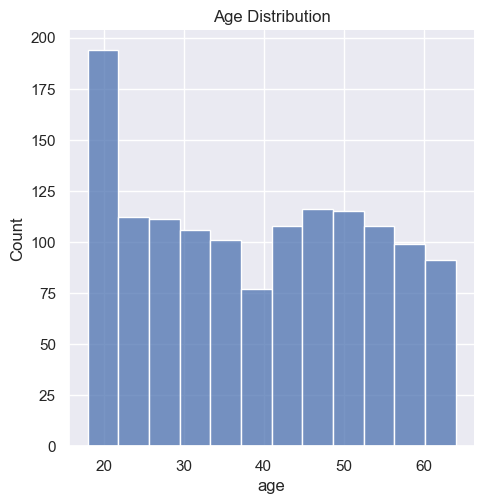

In [8]:
# Distribution of age Value

sns.set()
plt.figure(figsize=(6,6))
sns.displot(df['age'])
plt.title('Age Distribution')
plt.show()

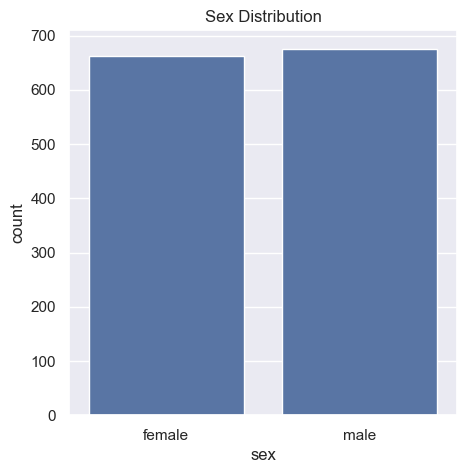

In [9]:
# Countplot of Gender Column

plt.figure(figsize=(5,5))
sns.countplot(x='sex',data=df)
plt.title('Sex Distribution')
plt.show()

In [10]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

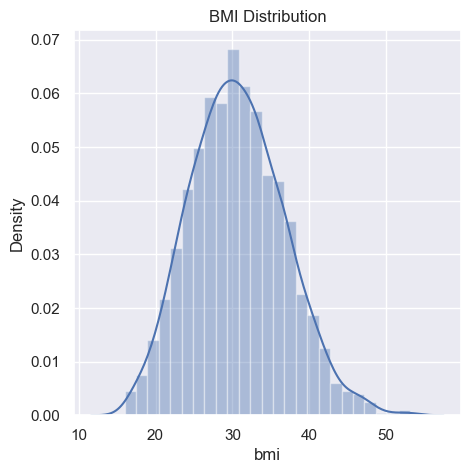

In [11]:
# BMI Distribution

plt.figure(figsize=(5,5))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

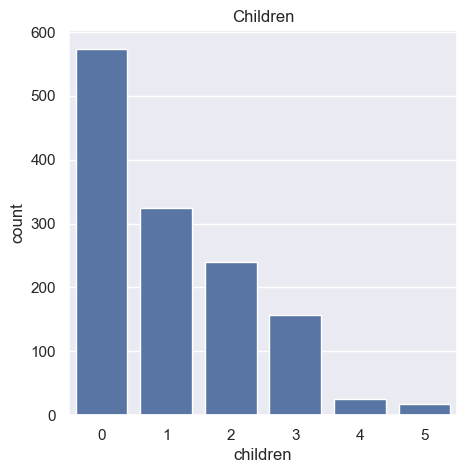

In [12]:
# Countplot of Children Column

plt.figure(figsize=(5,5))
sns.countplot(x='children',data=df)
plt.title('Children')
plt.show()

In [13]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

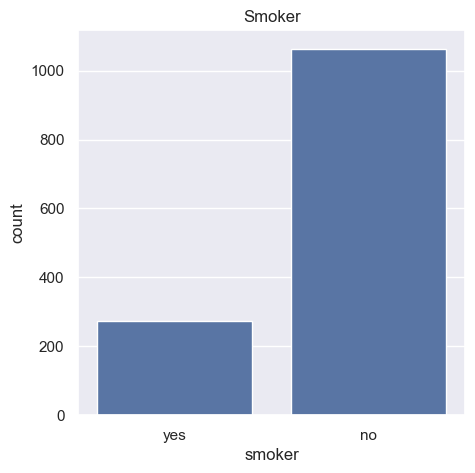

In [14]:
# Countplot of Smoker COlumn

plt.figure(figsize=(5,5))
sns.countplot(x='smoker',data=df)
plt.title('Smoker')
plt.show()

In [15]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

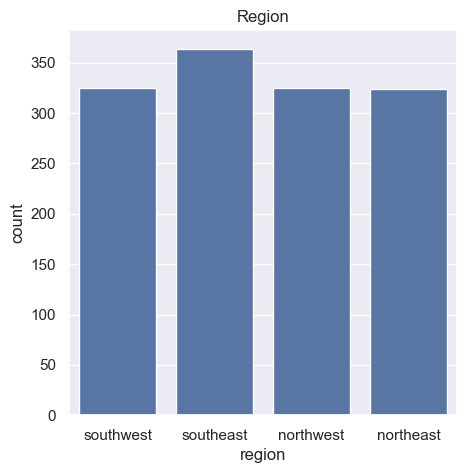

In [16]:
# Region Column

plt.figure(figsize=(5,5))
sns.countplot(x='region',data=df)
plt.title('Region')
plt.show()

In [17]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

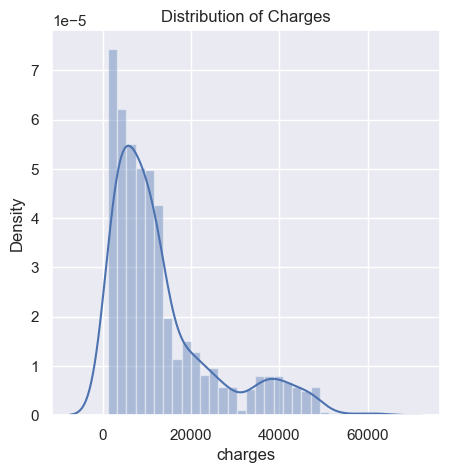

In [18]:
# Charges Column Distribution

plt.figure(figsize=(5,5))
sns.distplot(df['charges'])
plt.title('Distribution of Charges')
plt.show()

# Encoding the Categorical features

In [20]:
# Encoding the Sex Column
df.replace({'sex':{'male':0, 'female':1}},inplace=True)

# Encoding the Smoker Column
df.replace({'smoker':{'yes':0, 'no':1}},inplace=True)

# Encoding the Region Column
df.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}},inplace=True)

In [21]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


# Spliting the Features and Target Column

In [23]:
x=df.iloc[:,:-2]
y=df["charges"]

In [24]:
x

,age,sex,bmi,children,smoker
0,19,1,27.900,0,0
1,18,0,33.770,1,1
2,28,0,33.000,3,1
3,33,0,22.705,0,1
4,32,0,28.880,0,1
...,...,...,...,...,...
1333,50,0,30.970,3,1
1334,18,1,31.920,0,1
1335,18,1,36.850,0,1
1336,21,1,25.800,0,1


In [25]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

# Spliting the Data into Training data & Testing data

In [27]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=1)

In [28]:
xtrain.head()

,age,sex,bmi,children,smoker
216,53,1,26.600,0,1
731,53,0,21.400,1,1
866,18,0,37.290,0,1
202,60,1,24.035,0,1
820,45,0,33.700,1,1


# Model Training

In [30]:
#step-1: Import the model
from sklearn.linear_model import LinearRegression

#Step-2: Create the instance of the model
lr=LinearRegression()

#Step-3:Train the model
lr.fit(xtrain,ytrain)

#Step-4: Predict the model
ypred=lr.predict(xtest)

# Evaluate the Model

In [32]:
#Accuracy
from sklearn.metrics import r2_score
r2_score(ytest,ypred)

0.7608581750738531

In [33]:
# Errors
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [34]:
mean_absolute_error(ytest,ypred)

4037.952220017389

In [35]:
mse=mean_squared_error(ytest,ypred)
mse

35699244.58251514

In [36]:
np.sqrt(mse)

5974.8844827758085

# Predicting the Accuracy using Linear Regression

In [70]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)
r2_score(ytest,ypred)

0.7608581750738531

In [39]:
ypred

array([ 4100.43282559, 12693.04261163, 12808.93825952, 13634.43104889,
         989.14106269, 31836.69901918, 13260.4556974 , 11773.1368127 ,
        3269.04728479, 29967.12306097, 11566.2943743 , 17589.21131852,
        9102.82060306,  8688.8759399 ,  3506.91786571, 10773.56765472,
        3804.09391255,  7297.86635221, 15369.94892684, 14725.96903573,
       11923.73189064, 33235.48924194,  8931.10636446,  9379.93704037,
        2427.44626748,  8013.19788493,  9023.14928342, 11151.71675937,
        7960.88342028,  3869.66401139, 14376.0228159 ,  6184.02836295,
       34160.18316202, 26767.56074434, 33857.35566434,  9459.19016445,
       30637.57582122, 27011.99400001, 15477.04190131, 33686.87698538,
        6700.69819635, 13820.11681384, 11209.52515213, 15310.65265643,
        4609.12743162, 12569.54322362,  4697.63805101, 29017.60068768,
        7267.38694039, 13713.78648559, 13734.72880029, 12664.19925768,
        1770.5265761 ,  9269.43300796, 25525.26931937, 10341.82186649,
      

# Predicting the Accuracy using Decision Tree

In [82]:
from sklearn.tree import DecisionTreeRegressor

In [102]:
from sklearn import tree
dt=DecisionTreeRegressor()

In [106]:
def mymodel(model):
 model.fit(xtrain,ytrain)
 ypred = model.predict(xtest)
 print(r2_score(ytest,ypred))
 
 return model

In [108]:
mymodel(dt)

0.7030266857377145


DecisionTreeRegressor()

In [112]:
# Max Depth
for i in range(20,35):
 dt1 = DecisionTreeRegressor(max_depth = i)
 dt1.fit(xtrain,ytrain)
 ypred = dt1.predict(xtest)
 ac = r2_score(ytest,ypred)
 print(f"max_depth = {i} accuracy : {ac}")

max_depth = 20 accuracy : 0.6889722892412755
max_depth = 21 accuracy : 0.6995844762067311
max_depth = 22 accuracy : 0.7498757536549703
max_depth = 23 accuracy : 0.7049259169380042
max_depth = 24 accuracy : 0.7354082659066716
max_depth = 25 accuracy : 0.7261866442490917
max_depth = 26 accuracy : 0.7145702822243436
max_depth = 27 accuracy : 0.7032547278719702
max_depth = 28 accuracy : 0.7011318221797163
max_depth = 29 accuracy : 0.6920582522734697
max_depth = 30 accuracy : 0.7387108802328546
max_depth = 31 accuracy : 0.752047628800786
max_depth = 32 accuracy : 0.7265114042898174
max_depth = 33 accuracy : 0.6989227101166084
max_depth = 34 accuracy : 0.7328802146894223


In [160]:
dt2 = DecisionTreeRegressor(max_depth = 75)
mymodel(dt2)

0.7413718433071252


DecisionTreeRegressor(max_depth=75)

In [162]:
# Min Sample Split
for i in range(90,110):
 dt3 = DecisionTreeRegressor(min_samples_split = i)
 dt3.fit(xtrain,ytrain)
 ypred = dt3.predict(xtest)
 ac = r2_score(ytest,ypred)
 print(f"max_depth = {i} accuracy : {ac}")

max_depth = 90 accuracy : 0.8708165434046156
max_depth = 91 accuracy : 0.8708165434046156
max_depth = 92 accuracy : 0.8708165434046156
max_depth = 93 accuracy : 0.8708165434046156
max_depth = 94 accuracy : 0.8708165434046156
max_depth = 95 accuracy : 0.8708165434046156
max_depth = 96 accuracy : 0.8708165434046156
max_depth = 97 accuracy : 0.8708165434046156
max_depth = 98 accuracy : 0.8708165434046156
max_depth = 99 accuracy : 0.8708165434046156
max_depth = 100 accuracy : 0.8708165434046156
max_depth = 101 accuracy : 0.8708165434046156
max_depth = 102 accuracy : 0.8708165434046156
max_depth = 103 accuracy : 0.8708165434046156
max_depth = 104 accuracy : 0.8708165434046156
max_depth = 105 accuracy : 0.8708165434046156
max_depth = 106 accuracy : 0.8708165434046156
max_depth = 107 accuracy : 0.8653589827600984
max_depth = 108 accuracy : 0.8653589827600984
max_depth = 109 accuracy : 0.8653589827600984


In [166]:
dt4 = DecisionTreeRegressor(min_samples_split = 105)
mymodel(dt4)

0.8708165434046156


DecisionTreeRegressor(min_samples_split=105)

# Predicting the Accuracy using Random Forest

In [170]:
from sklearn.ensemble import RandomForestRegressor
rc = RandomForestRegressor()
rc.fit(xtrain,ytrain)
ypred = rc.predict(xtest)
print(r2_score(ytest,ypred))

0.8430354402795525


# Predicting the data using Gradient Boosting Regressor

In [189]:
from sklearn.ensemble import GradientBoostingRegressor
gbc = GradientBoostingRegressor()
gbc.fit(xtrain,ytrain)
ypred = gbc.predict(xtest)
print(r2_score(ytest,ypred))

0.8756816804655169


# Predicting the data using XGBRegressor

In [191]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(xtrain,ytrain)
ypred = xgb.predict(xtest)
print(r2_score(ytest,ypred))

0.8190655616173523


# Conclusion -

# Based on the above accuracy scores, we should go ahead with Decision Tree and Gradient Boosting